## Task 1

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime, timedelta
import os

In [4]:
!ls

bst_tutorial.ipynb	      I_LOFAR_workshop2020_pearse_murphy.pptx
bst_tutorial_solutions.ipynb  SST_tutorial
data


In [15]:
bstfile = "data/modea/20190612_133144_bst_00X.dat"
data = np.fromfile(bstfile)
print("Number of data points:",data.shape[0])
print("File size:",os.path.getsize(bstfile))
print("Bitmode:",os.path.getsize(bstfile)/data.shape[0])

#bitmode is 8 therefore 488 subbands (not always though)
t_len = data.shape[0]/488
print("Time samples:",t_len )

Number of data points: 585600
File size: 4684800
Bitmode: 8.0
Time samples: 1200.0


## Task 2

In [18]:
data = data.reshape(-1,488)
print(data.shape)
# ofrdata.reshape(data.shape[0]//488,488)

(1200, 488)


## Task 3

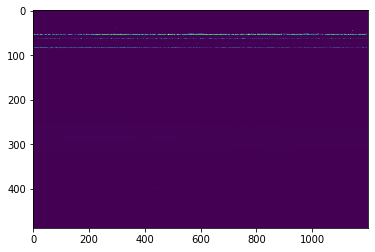

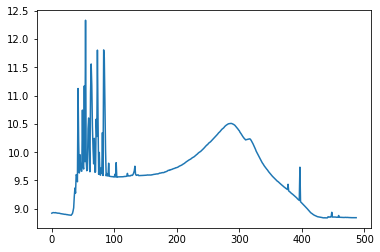

In [19]:
plt.imshow(data.T, aspect="auto")
plt.figure()
plt.plot(np.log10(np.sum(data,0)))

## Task 4

In [20]:
def sb_to_freq(sb):
    nyq_zone = 1
    clock = 200 #MHz
    freq = (nyq_zone-1+sb/512)*(clock/2)
    return freq #MHz

In [34]:
sbs = np.arange(7,495)
freqs = sb_to_freq(sbs)
# print(sbs)
# print(freqs)
obs_start = bstfile[len(bstfile)-27:len(bstfile)-12]

obs_start = datetime.strptime(obs_start, "%Y%m%d_%H%M%S")
print(obs_start)
obs_len  = timedelta(seconds = data.shape[0])
obs_end = obs_start + obs_len
t_lims = [obs_start, obs_end]

t_lims = dates.date2num(t_lims)
print(t_lims)
#you only really need start and end time for imshow but we'll do a full array anyway
t_arr = np.arange(0,t_len)
t_arr = t_arr*timedelta(seconds=1)
t_arr = obs_start+t_arr
t_arr = dates.date2num(t_arr)

2019-06-12 13:31:44
[737222.5637037  737222.57759259]


Text(0, 0.5, 'Frequency (MHz)')

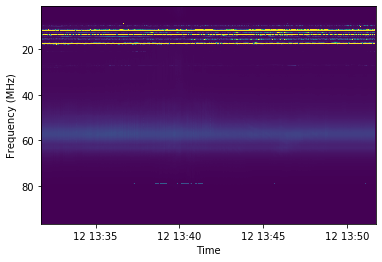

In [28]:
fig, ax = plt.subplots()
ax.imshow(data.T, aspect="auto", extent=[t_arr[0], t_arr[-1], freqs[-1], freqs[0]],
         vmin = np.percentile(data.T, 1), vmax = np.percentile(data.T, 99))
ax.xaxis_date()
plt.xlabel("Time")
plt.ylabel("Frequency (MHz)")

## Task 5

Text(0, 0.5, 'Frequency (MHz)')

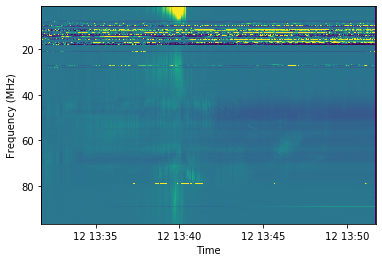

In [30]:
data = data/np.mean(data[:100], axis=0)
fig, ax = plt.subplots()
ax.imshow(data.T, aspect="auto", extent=[t_arr[0], t_arr[-1], freqs[-1], freqs[0]],
         vmin = np.percentile(data.T, 1), vmax = np.percentile(data.T, 99))
ax.xaxis_date()
plt.xlabel("Time")
plt.ylabel("Frequency (MHz)")